# Biblioteki

In [133]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import recall_score
from sklearn.linear_model import LogisticRegression
from lightgbm import LGBMClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, ConfusionMatrixDisplay, roc_curve, auc

# Analiza zbioru

In [134]:
df_heart = pd.read_csv("/Users/joann/Desktop/Dajana_ds/repozytoria/Heart_attact_project/heart_statlog_cleveland_hungary_final.csv")

In [135]:
df_heart.columns = df_heart.columns.str.replace(' ','_')

In [136]:
df_heart.head()

,age,sex,chest_pain_type,resting_bp_s,cholesterol,fasting_blood_sugar,resting_ecg,max_heart_rate,exercise_angina,oldpeak,ST_slope,target
0,40,1,2,140,289,0,0,172,0,0.0,1,0
1,49,0,3,160,180,0,0,156,0,1.0,2,1
2,37,1,2,130,283,0,1,98,0,0.0,1,0
3,48,0,4,138,214,0,0,108,1,1.5,2,1
4,54,1,3,150,195,0,0,122,0,0.0,1,0


In [137]:
df_heart.shape

(1190, 12)

In [138]:
print(df_heart['target'].unique())

[0 1]


In [139]:
df_heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1190 entries, 0 to 1189
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  1190 non-null   int64  
 1   sex                  1190 non-null   int64  
 2   chest_pain_type      1190 non-null   int64  
 3   resting_bp_s         1190 non-null   int64  
 4   cholesterol          1190 non-null   int64  
 5   fasting_blood_sugar  1190 non-null   int64  
 6   resting_ecg          1190 non-null   int64  
 7   max_heart_rate       1190 non-null   int64  
 8   exercise_angina      1190 non-null   int64  
 9   oldpeak              1190 non-null   float64
 10  ST_slope             1190 non-null   int64  
 11  target               1190 non-null   int64  
dtypes: float64(1), int64(11)
memory usage: 111.7 KB


In [140]:
df_heart.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1190.0,53.720168,9.358203,28.0,47.0,54.0,60.00,77.0
sex,1190.0,0.763866,0.424884,0.0,1.0,1.0,1.00,1.0
chest_pain_type,1190.0,3.232773,0.935480,1.0,3.0,4.0,4.00,4.0
resting_bp_s,1190.0,132.153782,18.368823,0.0,120.0,130.0,140.00,200.0
cholesterol,1190.0,210.363866,101.420489,0.0,188.0,229.0,269.75,603.0
fasting_blood_sugar,1190.0,0.213445,0.409912,0.0,0.0,0.0,0.00,1.0
resting_ecg,1190.0,0.698319,0.870359,0.0,0.0,0.0,2.00,2.0
max_heart_rate,1190.0,139.732773,25.517636,60.0,121.0,140.5,160.00,202.0
exercise_angina,1190.0,0.387395,0.487360,0.0,0.0,0.0,1.00,1.0
oldpeak,1190.0,0.922773,1.086337,-2.6,0.0,0.6,1.60,6.2


In [142]:
df_heart.isna().sum()

age                    0
sex                    0
chest_pain_type        0
resting_bp_s           0
cholesterol            0
fasting_blood_sugar    0
resting_ecg            0
max_heart_rate         0
exercise_angina        0
oldpeak                0
ST_slope               0
target                 0
dtype: int64

In [2]:
#df_heart.duplicated().sum()

# EDA

In [143]:
df_heart['target'].value_counts()

target
1    629
0    561
Name: count, dtype: int64

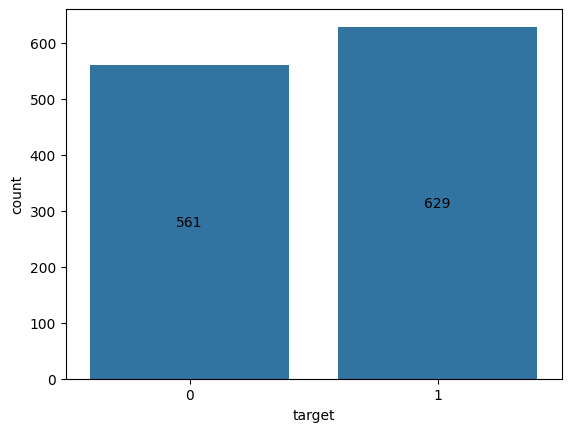

n=629
% positive samples: 52.85714285714286 %


In [144]:
plt.clf()
ax = sns.countplot(x=df_heart["target"])

# Dodanie wartości liczbowych wewnątrz prostokątów
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{int(height)}',
                (p.get_x() + p.get_width() / 2, height / 2),
                ha='center', va='center')

plt.show()

n = len(df_heart[df_heart["target"] == 1])
print(f"n={n}")
print(f"% positive samples: {n / len(df_heart) * 100} %")

# wynika z tego że zbiór danych jest względnie zbalanoswany

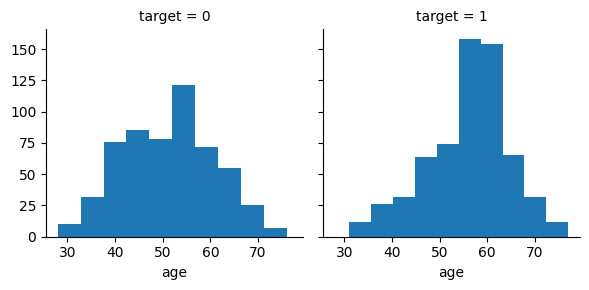

In [145]:
# Wykres wieku do choroby
age = sns.FacetGrid(df_heart, col='target')
age.map(plt.hist, 'age', bins=10)

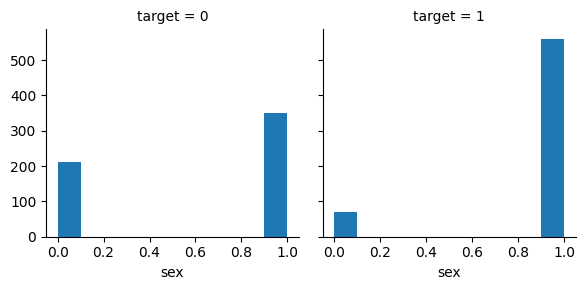

In [146]:
# Wpływ płć na choroby
sex = sns.FacetGrid(df_heart, col='target')
sex.map(plt.hist, 'sex', bins=10)

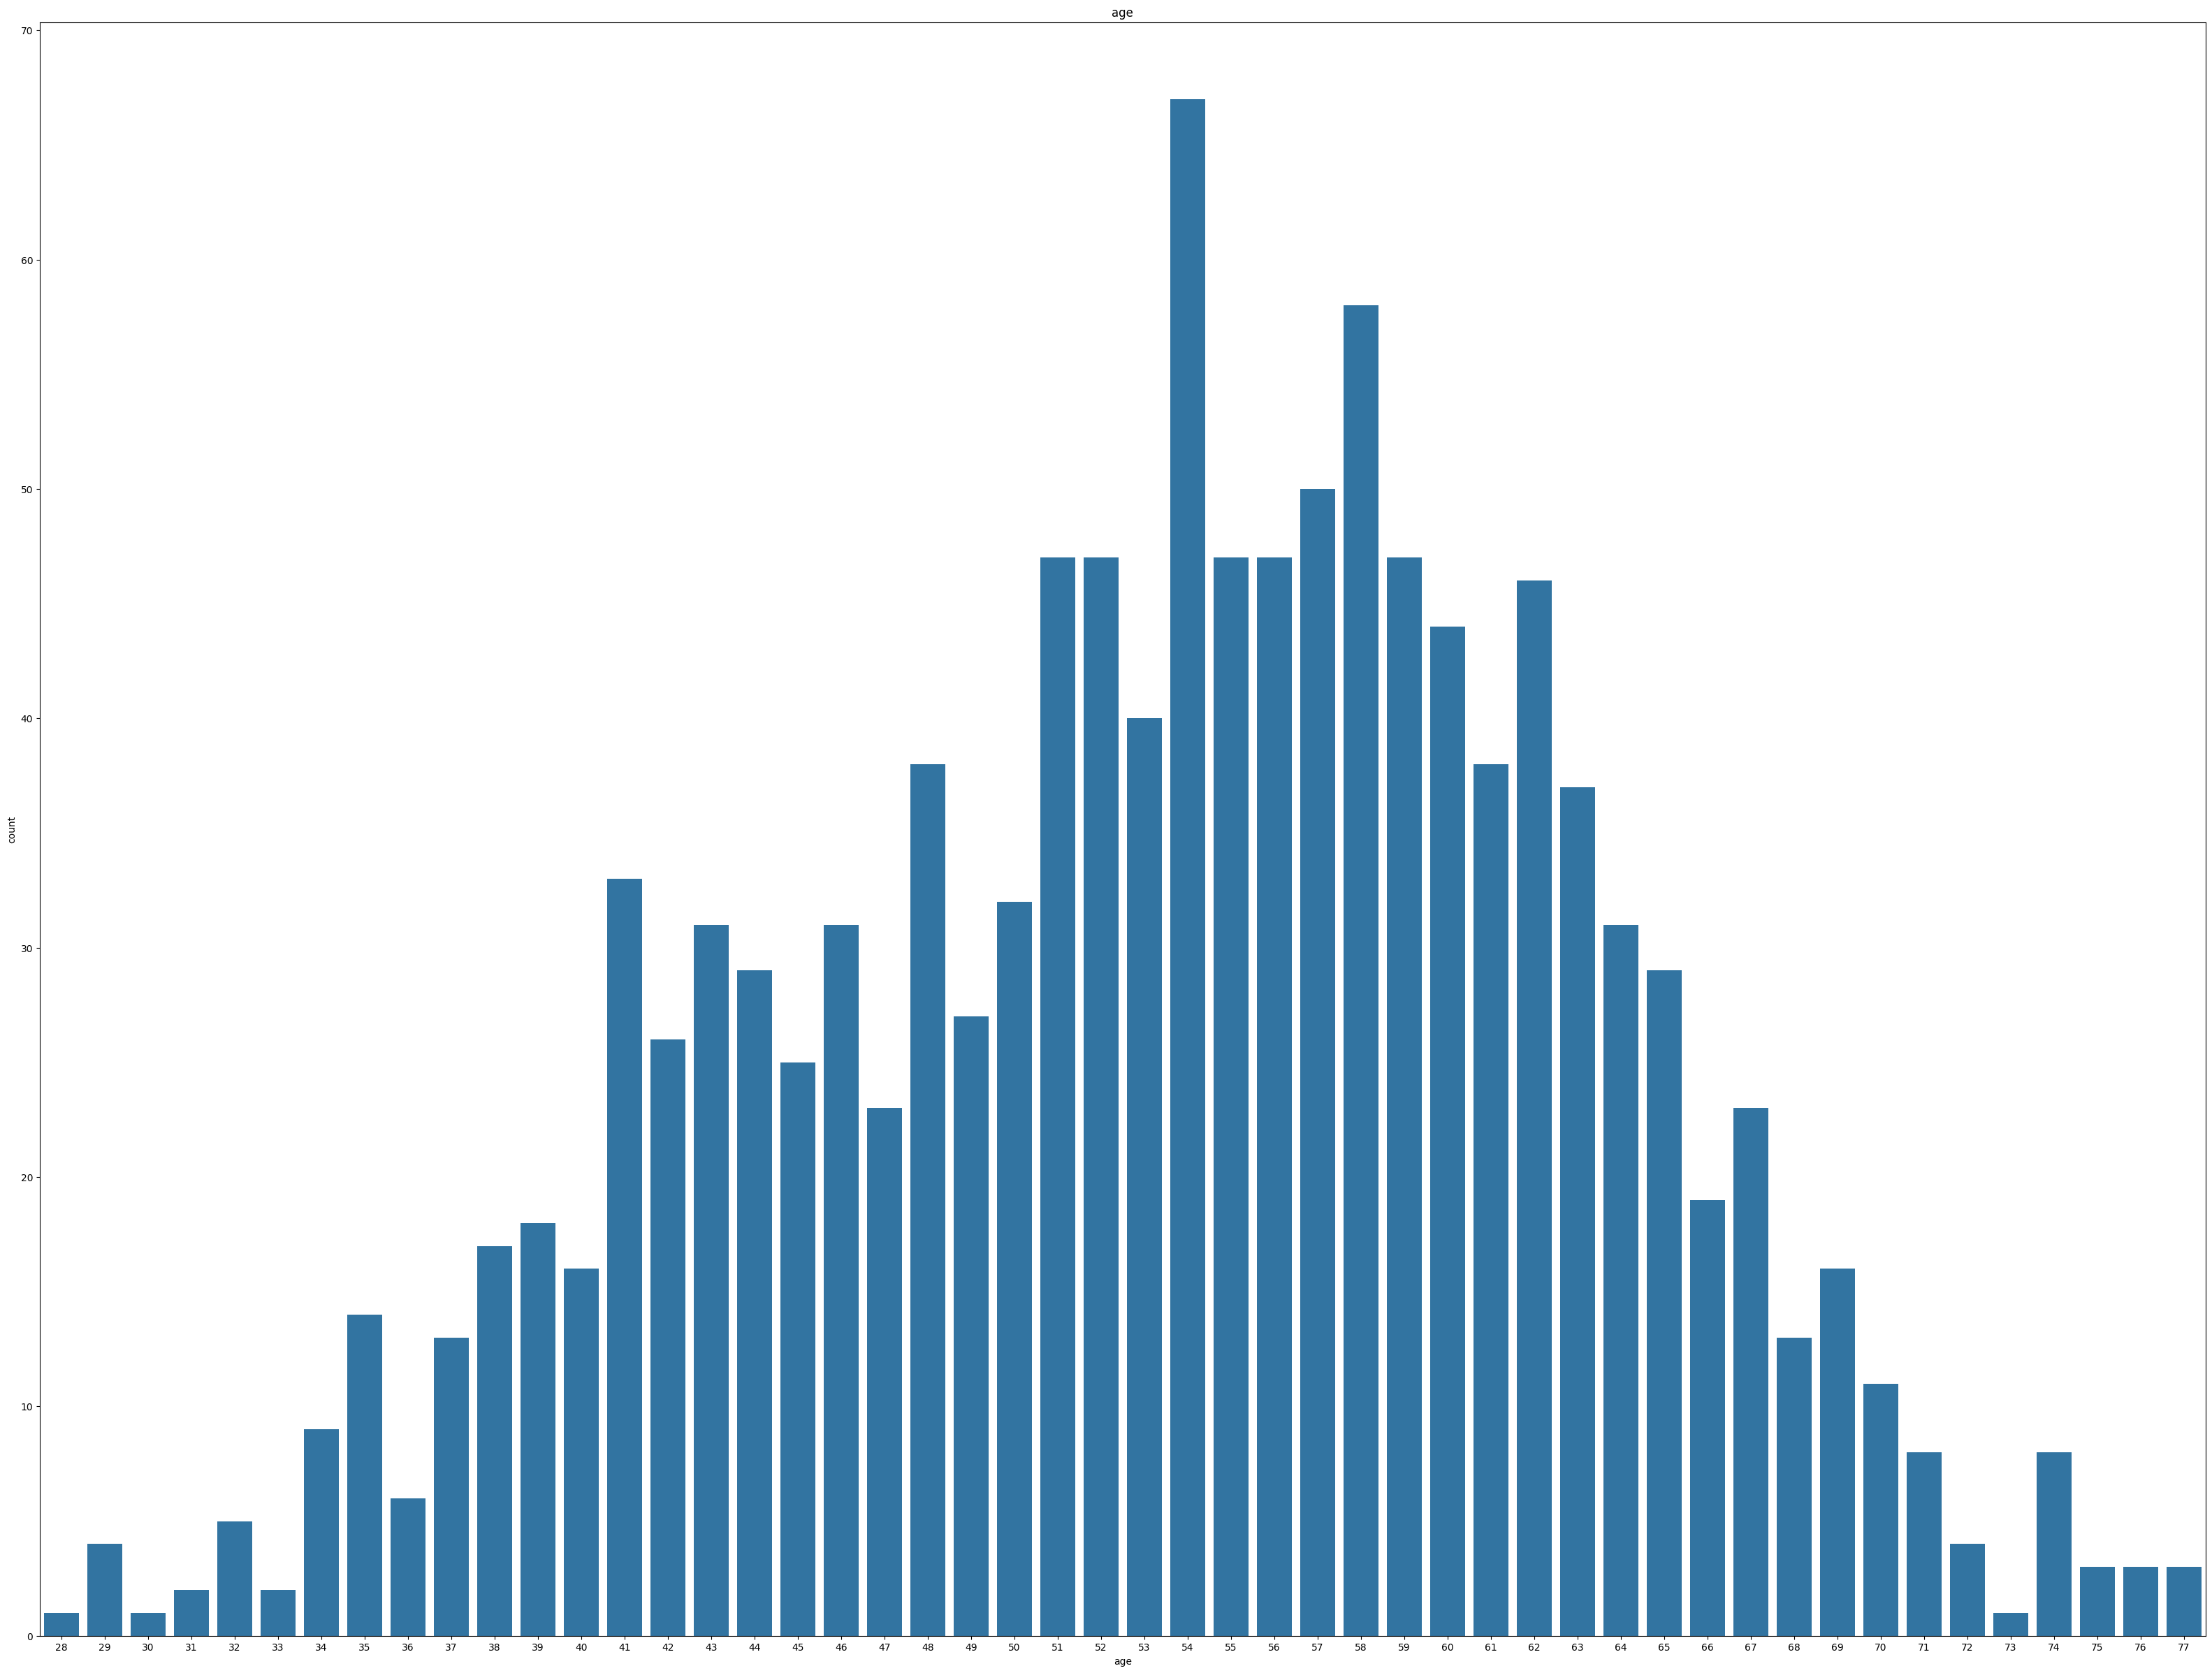

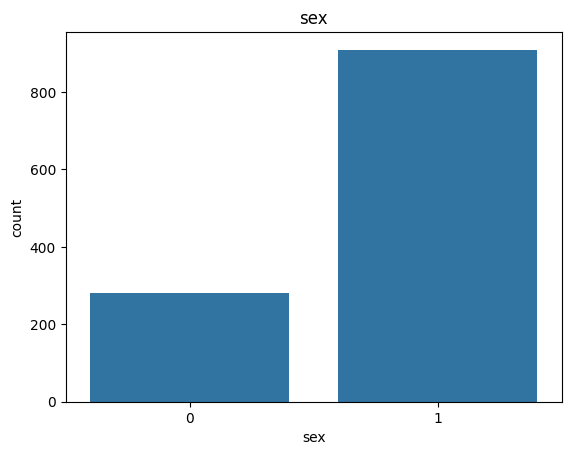

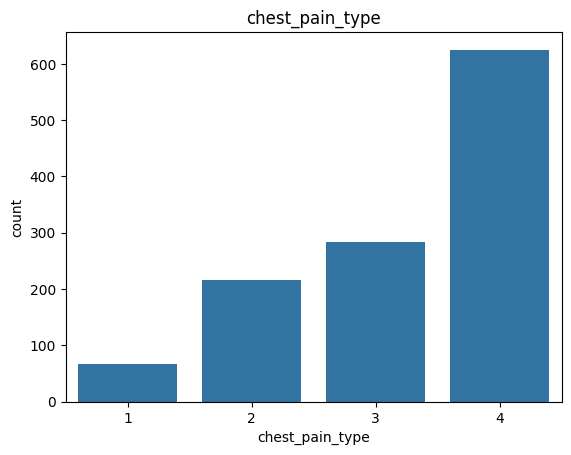

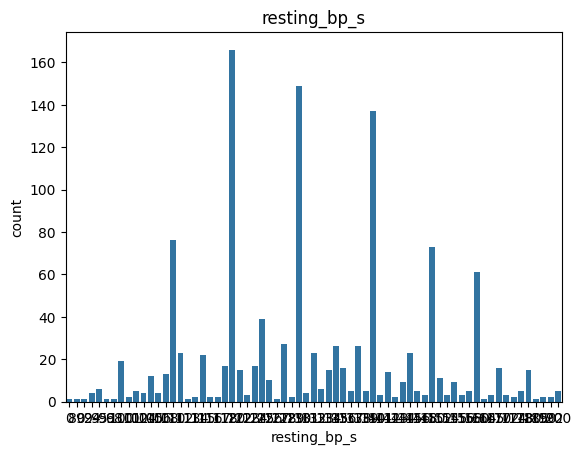

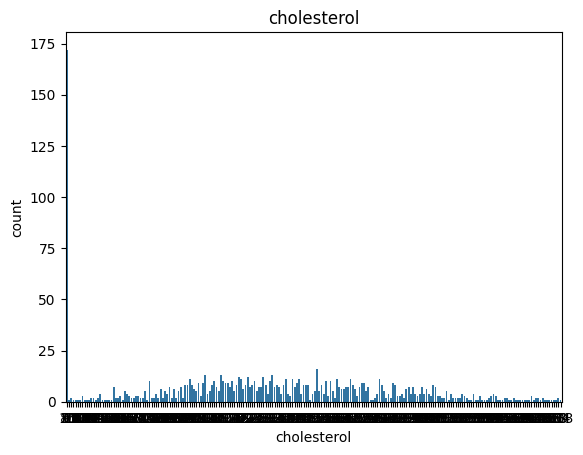

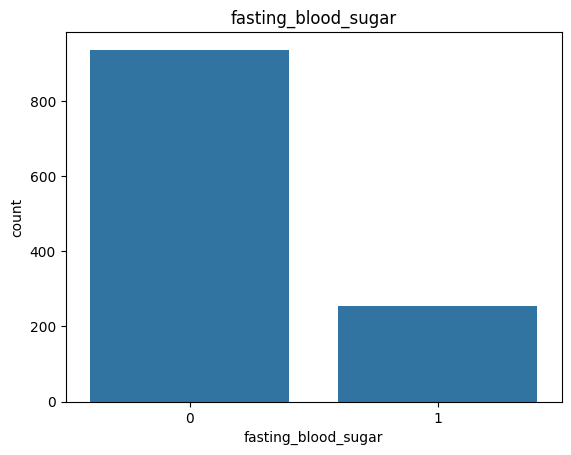

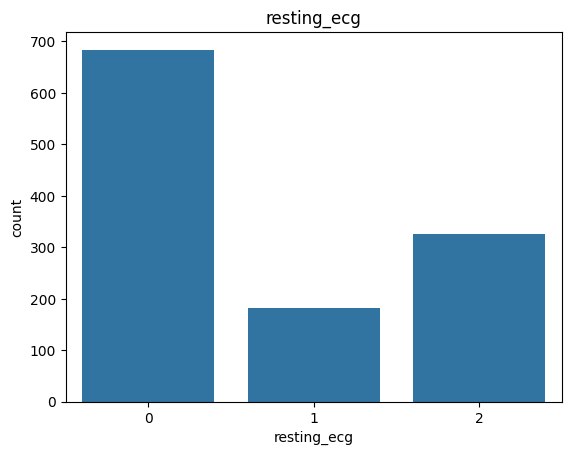

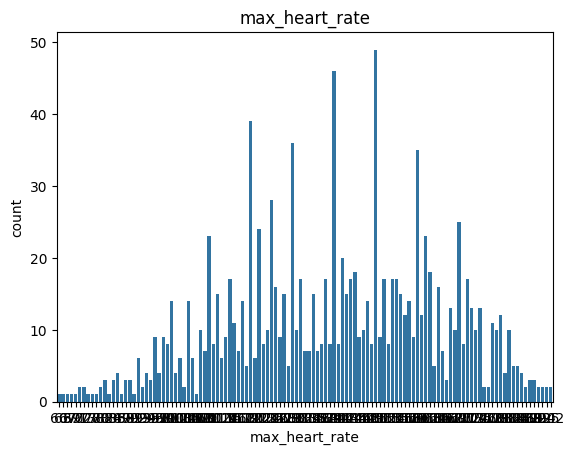

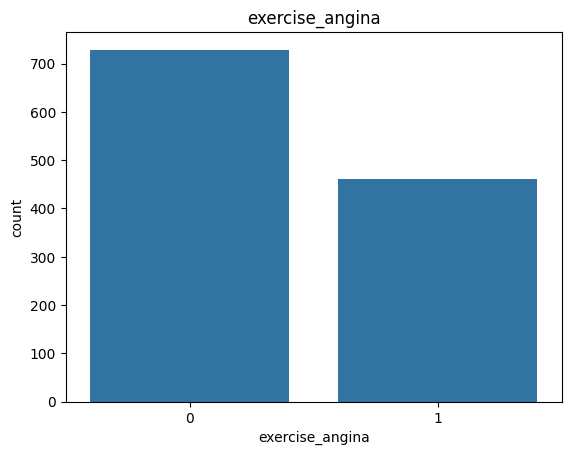

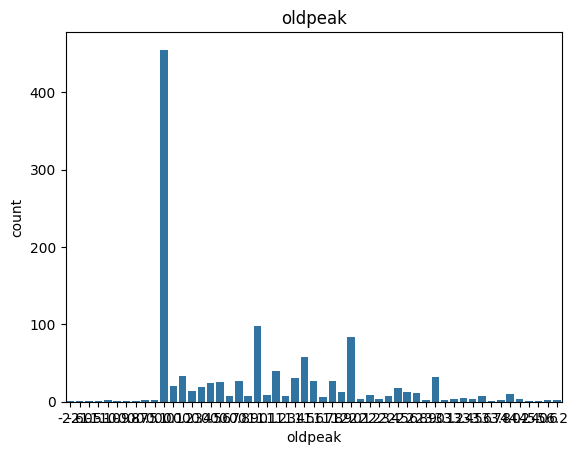

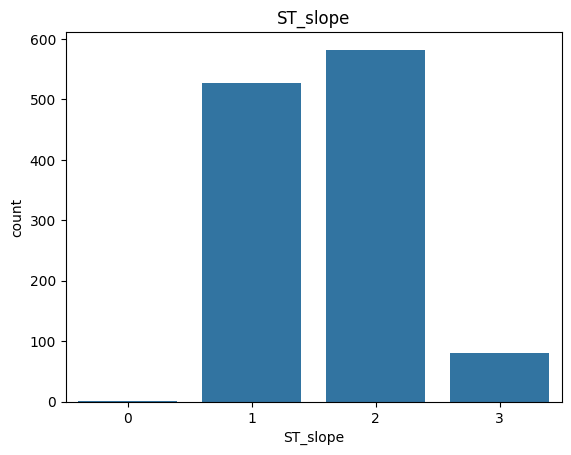

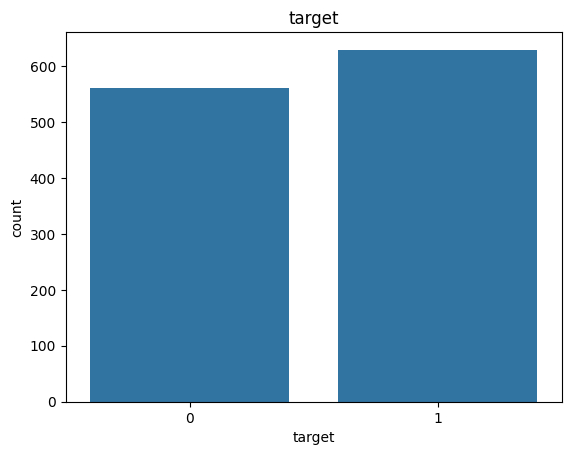

In [151]:
# Rozkład zmiennych numerycznych
def get_columns_by_dtype(df, include=None, exclude=None):
    return df.select_dtypes(include=include, exclude=exclude).columns.tolist()

numerical_columns = get_columns_by_dtype(df_heart, include=['number'])

plt.figure(figsize=(40,30), dpi=100)

for num, col in enumerate(list(numerical_columns), 1):
    sns.countplot(x=df_heart[col])
    plt.title(col)
    plt.show()

In [148]:
# Badanie korelacji
df_heart.corr
corr_matrix = df_heart.corr()
filtered = corr_matrix[(corr_matrix > 0.5) | (corr_matrix < -0.5)]

In [149]:
filtered

,age,sex,chest_pain_type,resting_bp_s,cholesterol,fasting_blood_sugar,resting_ecg,max_heart_rate,exercise_angina,oldpeak,ST_slope,target
age,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
sex,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
chest_pain_type,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
resting_bp_s,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cholesterol,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
fasting_blood_sugar,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN
resting_ecg,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
max_heart_rate,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN
exercise_angina,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN
oldpeak,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,0.524639,NaN


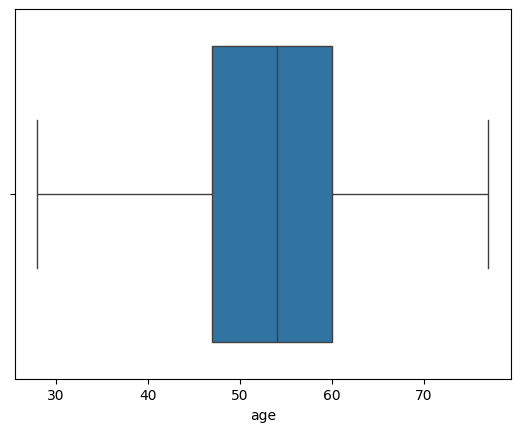

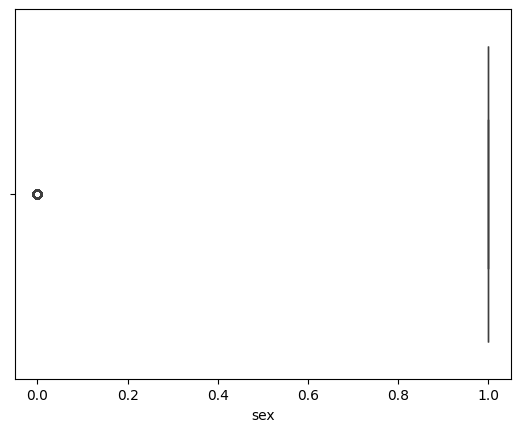

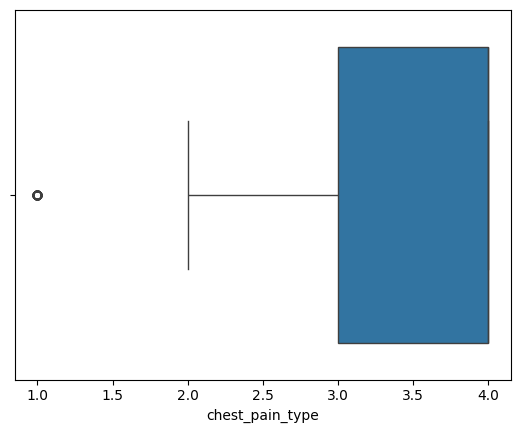

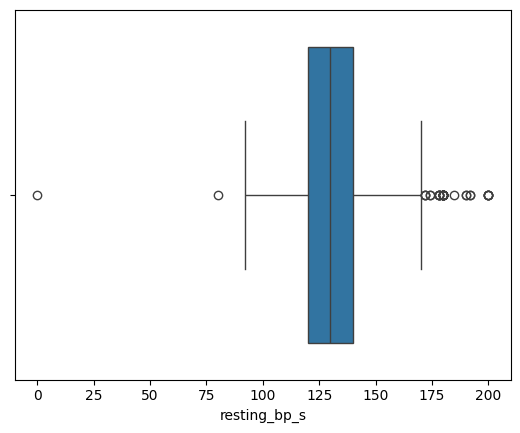

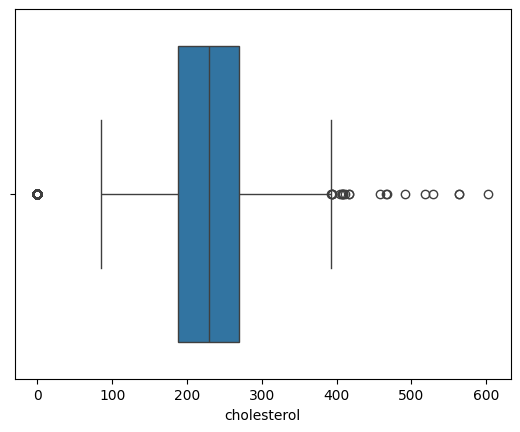

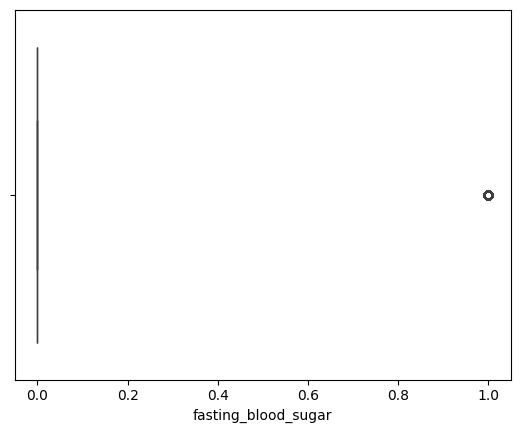

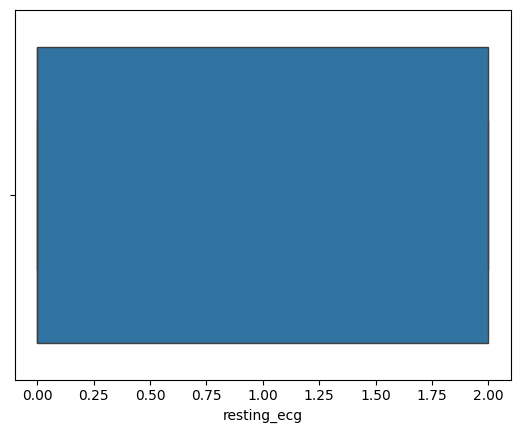

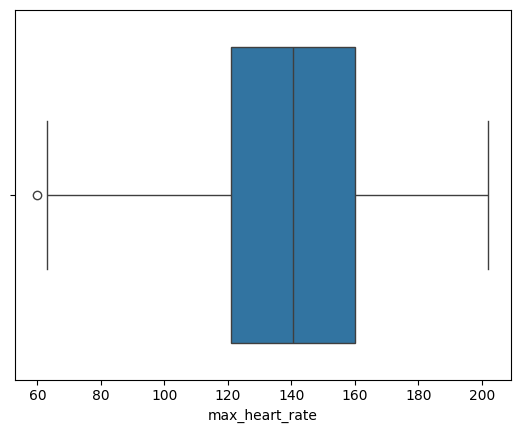

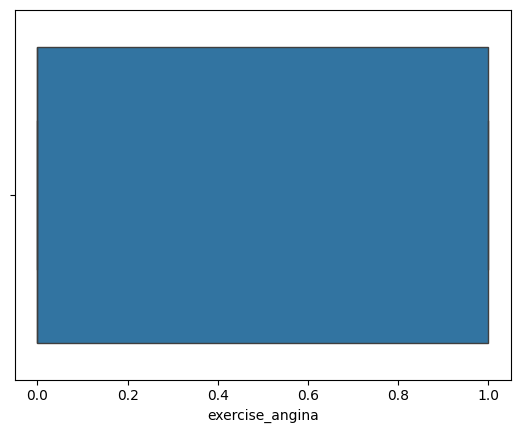

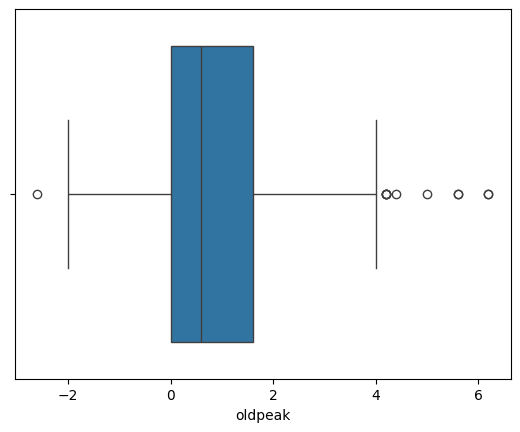

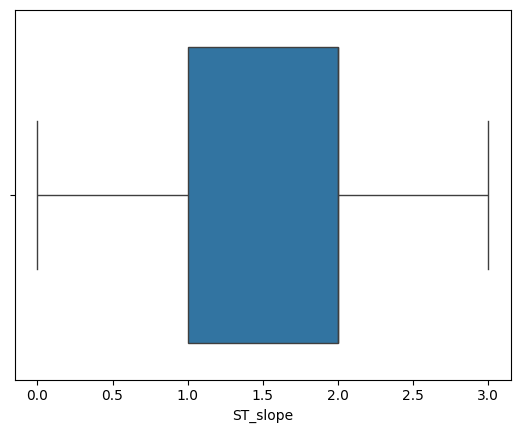

In [150]:
# Analiza punktów skajnych
outliners = ['age', 'sex', 'chest_pain_type', 'resting_bp_s', 'cholesterol',
       'fasting_blood_sugar', 'resting_ecg', 'max_heart_rate',
       'exercise_angina', 'oldpeak', 'ST_slope', ]

for i, col in enumerate(df_heart[outliners]):
  sns.boxplot(x=col, data=df_heart)
  plt.show()

In [152]:
# Usuwanie punktów skrajnych za pomocą metody opartej na zakresie między kwartylowym

def detect_outliers(df_heart, n, features):
    outliers_indices = []
    for col in features:
        Q1 = np.percentile(df_heart[col], 25)
        Q3 = np.percentile(df_heart[col], 75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outlier_index_list = df_heart[(df_heart[col] < lower_bound) | (df_heart[col] > upper_bound)].index
        outliers_indices.extend(outlier_index_list)
    outliers_indices = pd.Series(outliers_indices)
    return outliers_indices.value_counts().index[:n]

outliers_to_drop = detect_outliers(df_heart, 5, numerical_columns)
print('Indeksy wartości odstających do usunięcia:', outliers_to_drop)

Indeksy wartości odstających do usunięcia: Index([397, 366, 340, 323, 306], dtype='int64')


In [153]:
df_heart = df_heart.drop(outliers_to_drop, axis=0)

In [154]:
df_heart.shape

(1185, 12)

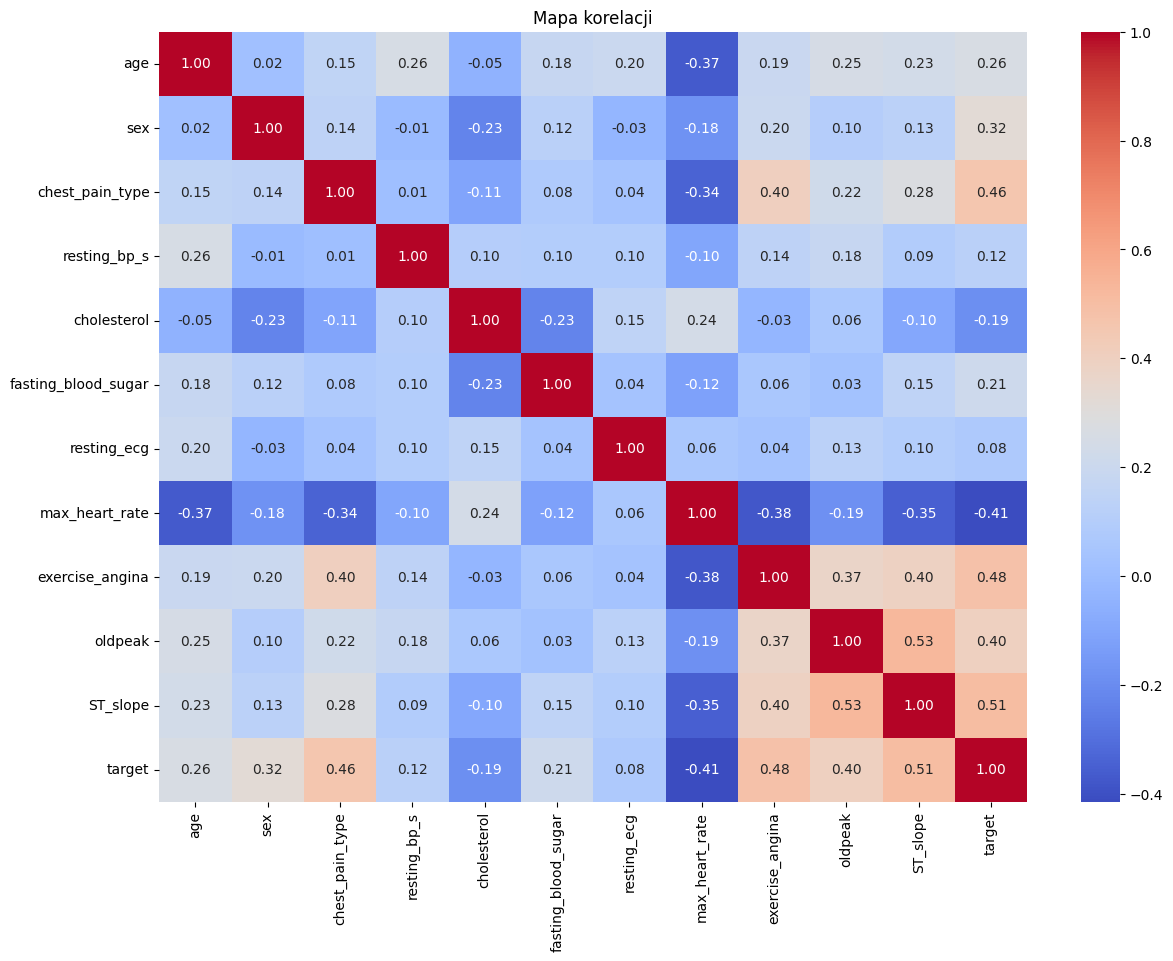

In [155]:
# Analiza korelacji i wykres korelacji
corr_matrix = df_heart.corr()
plt.figure(figsize=(14, 10))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title("Mapa korelacji")
plt.show()

# Feature Selection

In [156]:
X = df_heart.drop(columns=['target'], axis=1)
y = df_heart['target']

In [157]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [158]:
# Standaryzacja danych
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Model regresji logistycznej

In [159]:
lg = LogisticRegression(max_iter=1000)
lg.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [160]:
# Ocena jakość modelu
lg.score(X_train, y_train)

0.8333333333333334

In [161]:
y_pred_lg_train = lg.predict(X_train)
y_pred_lg_test = lg.predict(X_test)
print(accuracy_score(y_train, y_pred_lg_train))
print(accuracy_score(y_test, y_pred_lg_test))

0.8333333333333334
0.8354430379746836


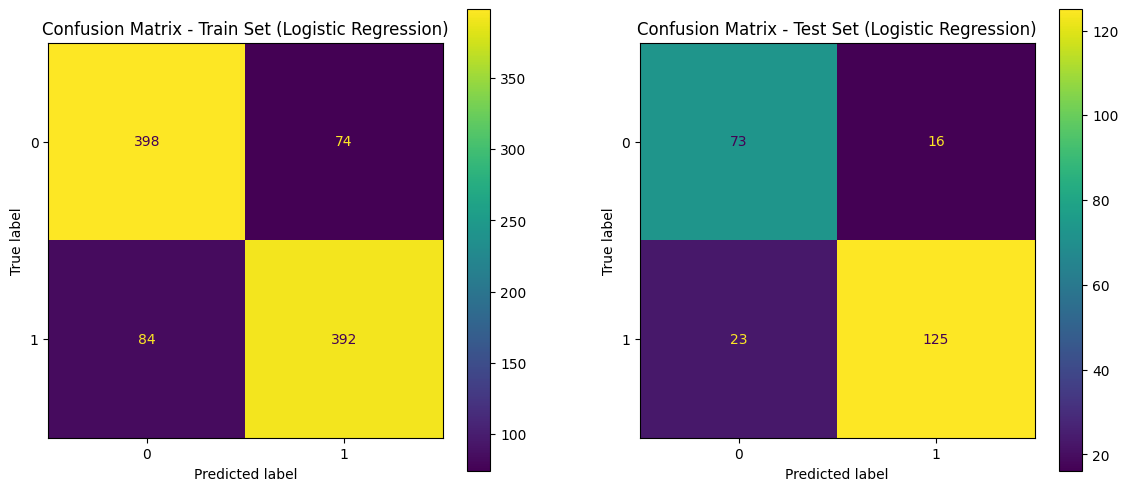

In [162]:
fig, ax = plt.subplots(1,2,figsize=(14,6))
ConfusionMatrixDisplay.from_predictions(y_train, y_pred_lg_train, ax=ax[0])
ax[0].set_title('Confusion Matrix - Train Set (Logistic Regression)')
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_lg_test, ax=ax[1])
ax[1].set_title('Confusion Matrix - Test Set (Logistic Regression)')
plt.show()

In [163]:
print(classification_report(y_test, y_pred_lg))

              precision    recall  f1-score   support

           0       0.76      0.82      0.79        89
           1       0.89      0.84      0.87       148

    accuracy                           0.84       237
   macro avg       0.82      0.83      0.83       237
weighted avg       0.84      0.84      0.84       237



# Model LGBM

In [164]:
lgbm = LGBMClassifier()
lgbm.fit(X_train, y_train)

[LightGBM] [Info] Number of positive: 476, number of negative: 472
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000396 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 413
[LightGBM] [Info] Number of data points in the train set: 948, number of used features: 11
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.502110 -> initscore=0.008439
[LightGBM] [Info] Start training from score 0.008439


LGBMClassifier()

In [165]:
# Ocena jakość modelu
lgbm.score(X_train, y_train)

0.9968354430379747

In [166]:
y_pred_lgbm_train = lgbm.predict(X_train)
y_pred_lgbm_test = lgbm.predict(X_test)
print(accuracy_score(y_train, y_pred_lgbm_train))
print(accuracy_score(y_test, y_pred_lgbm_test))

0.9968354430379747
0.9113924050632911


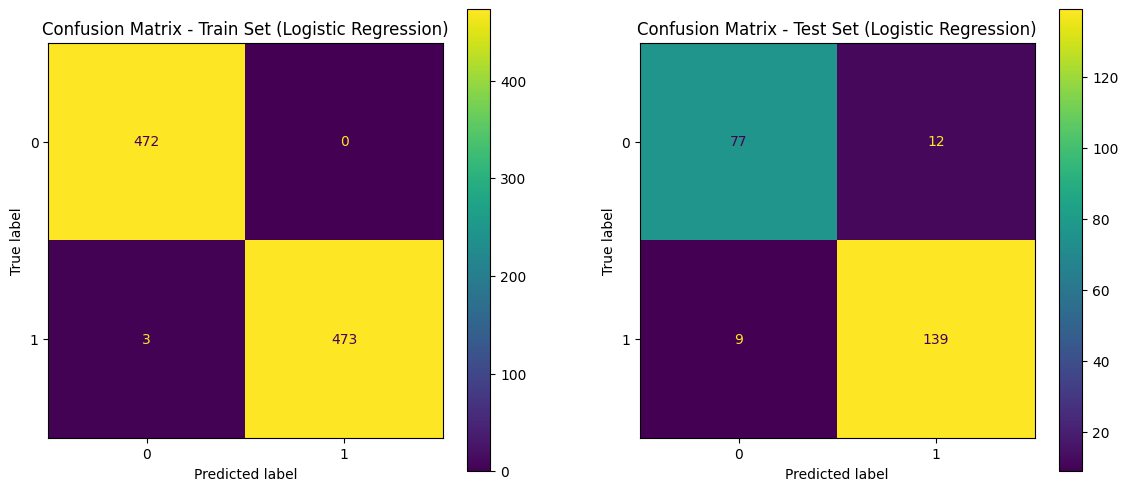

In [167]:
fig, ax = plt.subplots(1,2,figsize=(14,6))
ConfusionMatrixDisplay.from_predictions(y_train, y_pred_lgbm_train, ax=ax[0])
ax[0].set_title('Confusion Matrix - Train Set (Logistic Regression)')
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_lgbm_test, ax=ax[1])
ax[1].set_title('Confusion Matrix - Test Set (Logistic Regression)')
plt.show()

In [169]:
print(classification_report(y_test, y_pred_lgbm))

              precision    recall  f1-score   support

           0       0.90      0.87      0.88        89
           1       0.92      0.94      0.93       148

    accuracy                           0.91       237
   macro avg       0.91      0.90      0.90       237
weighted avg       0.91      0.91      0.91       237



# Porównanie modeli

In [170]:
# Porównanie modeli
regresja_logistyczna = {'train_accuracy': round(lg.score(X_train, y_train), 2), 'test_accuracy': round(accuracy_score(y_test, y_pred_lg_test), 2), 'train_recall': round(recall_score(y_train, y_pred_lg_train'), 2), 'test_recall': round(recall_score(y_test, y_pred_lg_test, average='weighted'), 2)}
LGBMClassifier = {'train_accuracy': round(lgbm.score(X_train, y_train), 2), 'test_accuracy': round(accuracy_score(y_test, y_pred_lgbm_test), 2), 'train_recall': round(recall_score(y_train, y_pred_lgbm_train), 2), 'test_recall': round(recall_score(y_test, y_pred_lgbm_test, average='weighted'), 2)}

In [172]:
pd.DataFrame({'regresja_logistyczna': regresja_logistyczna, 'LGBMClassifier' : LGBMClassifier})

,regresja_logistyczna,LGBMClassifier
train_accuracy,0.83,1.00
test_accuracy,0.84,0.91
train_recall,0.83,1.00
test_recall,0.84,0.91


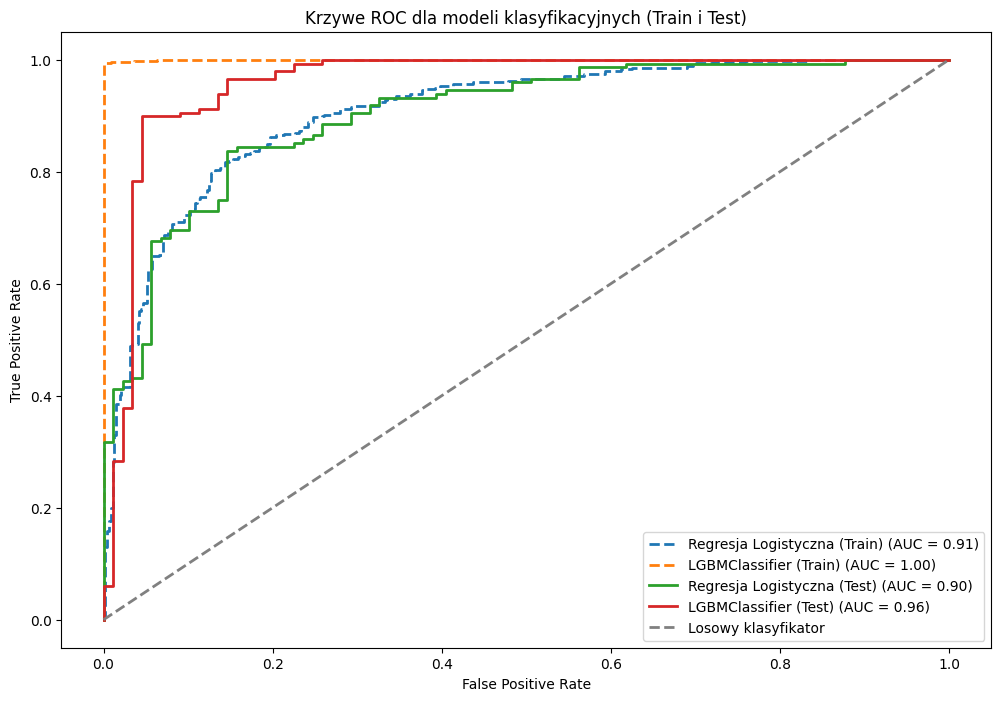

In [183]:
def plot_combined_roc_curve(y_train, y_test, y_pred_proba_train_dict, y_pred_proba_test_dict):
    plt.figure(figsize=(12, 8))
    
    for model_name, y_pred_proba_train in y_pred_proba_train_dict.items():
        fpr_train, tpr_train, _ = roc_curve(y_train, y_pred_proba_train)
        roc_auc_train = auc(fpr_train, tpr_train)
        plt.plot(fpr_train, tpr_train, linestyle='--', lw=2, label=f'{model_name} (Train) (AUC = {roc_auc_train:.2f})')
    
    for model_name, y_pred_proba_test in y_pred_proba_test_dict.items():
        fpr_test, tpr_test, _ = roc_curve(y_test, y_pred_proba_test)
        roc_auc_test = auc(fpr_test, tpr_test)
        plt.plot(fpr_test, tpr_test, lw=2, label=f'{model_name} (Test) (AUC = {roc_auc_test:.2f})')
    
    plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--', label='Losowy klasyfikator')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Krzywe ROC dla modeli klasyfikacyjnych (Train i Test)')
    plt.legend(loc='lower right')
    plt.show()

y_pred_proba_lg_train = lg.predict_proba(X_train)[:, 1]
y_pred_proba_lg_test = lg.predict_proba(X_test)[:, 1]

y_pred_proba_lgbm_train = lgbm.predict_proba(X_train)[:, 1]
y_pred_proba_lgbm_test = lgbm.predict_proba(X_test)[:, 1]

y_pred_proba_train_dict = {
    'Regresja Logistyczna': y_pred_proba_lg_train,
    'LGBMClassifier': y_pred_proba_lgbm_train
}

y_pred_proba_test_dict = {
    'Regresja Logistyczna': y_pred_proba_lg_test,
    'LGBMClassifier': y_pred_proba_lgbm_test
}

plot_combined_roc_curve(y_train, y_test, y_pred_proba_train_dict, y_pred_proba_test_dict)


# Interaktywny dashboard

In [41]:
!pip install explainerdashboard

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 287.8/287.8 kB 2.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 222.5/222.5 kB 16.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.5/7.5 MB 42.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 91.8/91.8 kB 9.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 540.5/540.5 kB 43.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.7/56.7 kB 9.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 146.0/146.0 kB 20.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 83.5 MB/s eta 0:00:00


In [42]:
pip install --upgrade dash explainerdashboard

In [43]:
from explainerdashboard import ClassifierExplainer, ExplainerDashboard

In [44]:
explainer = ClassifierExplainer(lgbm, X_test, y_test)

Note: model_output=='probability'. For LGBMClassifier shap values normally get calculated against X_background, but paramater X_background=None, so using X instead
Generating self.shap_explainer = shap.TreeExplainer(model, X, model_output='probability', feature_perturbation='interventional')...
Note: Shap interaction values will not be available. If shap values in probability space are not necessary you can pass model_output='logodds' to get shap values in logodds without the need for a background dataset and also working shap interaction values...


In [45]:
ExplainerDashboard(explainer).run()

Building ExplainerDashboard..
Detected google colab environment, setting mode='external'
For this type of model and model_output interactions don't work, so setting shap_interaction=False...
The explainer object has no decision_trees property. so setting decision_trees=False...
Generating layout...
Calculating shap values...


/usr/local/lib/python3.10/dist-packages/dash/dash.py:556: UserWarning:

JupyterDash is deprecated, use Dash instead.
See https://dash.plotly.com/dash-in-jupyter for more details.



Calculating prediction probabilities...
Calculating metrics...
Calculating confusion matrices...
Calculating classification_dfs...
Calculating roc auc curves...
Calculating pr auc curves...
Calculating liftcurve_dfs...
Calculating dependencies...
Calculating permutation importances (if slow, try setting n_jobs parameter)...
Calculating predictions...
Calculating pred_percentiles...
Reminder: you can store the explainer (including calculated dependencies) with explainer.dump('explainer.joblib') and reload with e.g. ClassifierExplainer.from_file('explainer.joblib')
Registering callbacks...
Starting ExplainerDashboard on http://172.28.0.12:8050
You can terminate the dashboard with ExplainerDashboard.terminate(8050)


<IPython.core.display.Javascript object>

Dash app running on:


<IPython.core.display.Javascript object>